<a href="https://colab.research.google.com/github/muhzaafrils/PCVK_Genap_2021/blob/main/Week3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


 mengubah tingkat kecerahan citra 
 -------------------------------- 
Masukan nilai kecerahan: 50


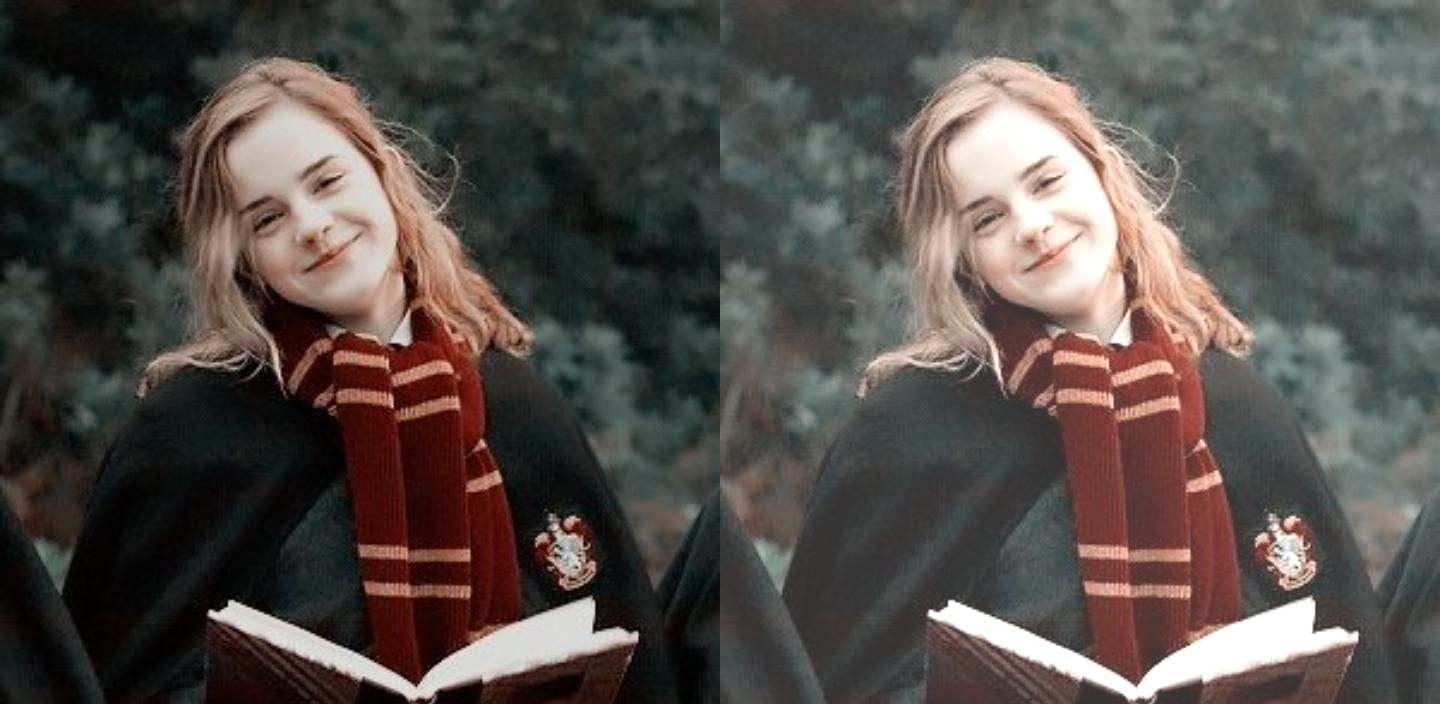

In [4]:
import cv2 as cv
import numpy as np
from google.colab.patches import cv2_imshow
print(' mengubah tingkat kecerahan citra ')
print(' -------------------------------- ')

try:
  brightness = int(input('Masukan nilai kecerahan: '))
except ValueError:
  print('Error, bukan angka')

original = cv.imread('/content/drive/MyDrive/PCVK/m3/female.jpg')
brightness_image = np.zeros(original.shape, original.dtype)

#akses per piksel

for y in range(original.shape[0]):
  for x in range(original.shape[1]):
    for c in range(original.shape[2]):
      brightness_image[y,x,c] = np.clip(original[y,x,c] + brightness, 0, 255)

#cara simple tanpa loop
#brightness_image = cv.convertScaleAbs(original, beta-brightness)

final_frame = cv.hconcat((original, brightness_image))
cv2_imshow(final_frame)

TUGAS PRAKTIKUM 
1. Implementasikan transformasi contrast pada Google Colaboratory menggunakan formula yang terdapat pada bagian Ulasan Teori, sehingga menghasilkan keluaran seperti berikut:

Mengubah tingkat kecerahan citra
--------------------------------
Masukkan nilai kecerahan[-255 - 255]: 60
Masukkan kontras [1.0 - 3.0]1.5


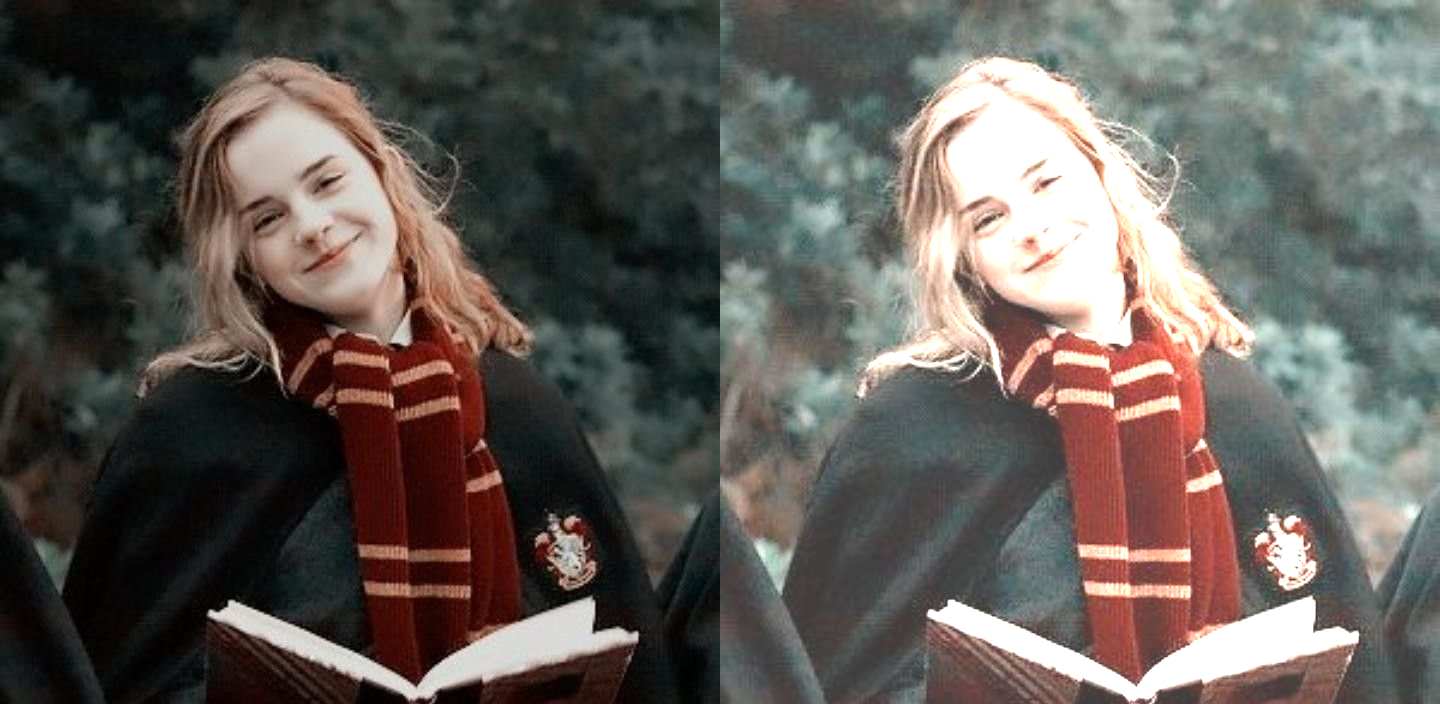

In [5]:
print('Mengubah tingkat kecerahan citra')
print('--------------------------------')
try :
  brightness = int(input('Masukkan nilai kecerahan[-255 - 255]: '))
  contrast = float(input('Masukkan kontras [1.0 - 3.0]'))
except ValueError:
  print('Error, not a number')


original = cv.imread('/content/drive/MyDrive/PCVK/m3/female.jpg')
contrast_image = np.zeros(original.shape, original.dtype)

for y in range(original.shape[0]):
  for x in range(original.shape[1]):
    for c in range(original.shape[2]):
      contrast_image[y,x,c] = np.clip(contrast*original[y,x,c] + brightness, 0, 255)


final_frame = cv.hconcat((original, contrast_image))
cv2_imshow(final_frame)

2. Implementasikan transformasi logarithmic brightness pada Google Colaboratory menggunakan formula yang terdapat pada bagian Ulasan Teori, sehingga menghasilkan keluaran seperti berikut:

Mengubah tingkat kecerahan citra
--------------------------------
Masukkan nilai kecerahan: 40


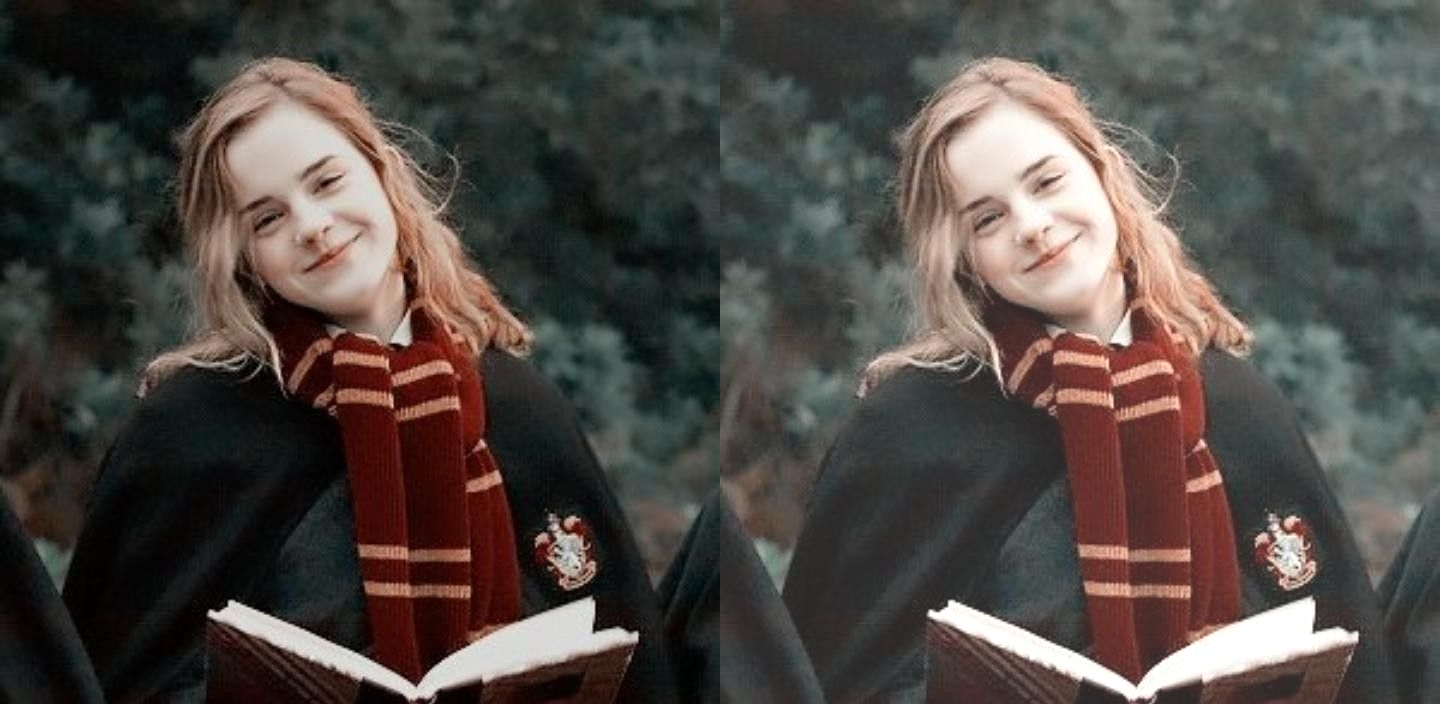

In [6]:
import cv2 as cv
import numpy as np
from google.colab.patches import cv2_imshow
from tkinter import Frame

print('Mengubah tingkat kecerahan citra')
print('--------------------------------')
try:
  brightness = int(input('Masukkan nilai kecerahan: '))
except ValueError:
  print('Error, not a number')

original = cv.imread('/content/drive/MyDrive/PCVK/m3/female.jpg')
brightness_image = np.zeros(original.shape, original.dtype)

#akses per piksel
for y in range(original.shape[0]):
  for x in range(original.shape[1]):
    for c in range(original.shape[2]):
      brightness_image[y,x,c] = np.clip(original[y,x,c] + brightness, 0, 255)

#cara simple tanpa for loop
#brightness_image = cv.convertScaleAbs(original, beta=brightness)

final_frame = cv.hconcat((original, brightness_image))
cv2_imshow(final_frame)

3. Implementasikan transformasi grayscale menggunakan metode averaging, lightness, dan luminance pada Google Colaboratory menggunakan formula yang terdapat pada bagian Ulasan Teori, sehingga menghasilkan keluaran seperti berikut: 
* a. Averaging

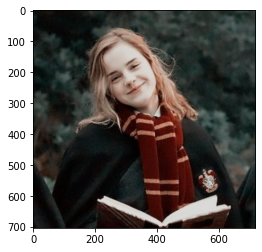

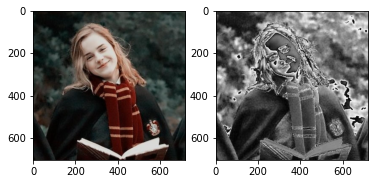

In [7]:
import cv2 as cv 
from google.colab.patches import cv2_imshow
from skimage import io
import matplotlib.pyplot as plt
import numpy as np
import math

img = cv.imread('/content/drive/MyDrive/PCVK/m3/female.jpg')
img_color = cv.cvtColor(img,cv.COLOR_BGR2RGB)

plt.imshow(img_color)

# ekstraksi 3 channel warna
# image[x,y,c]
R, G, B = img_color[:,:,0], img_color[:,:,1],img_color[:,:,2]

gray_img = ( R + G + B) * 0.3

f, axarr = plt.subplots(1,2) #membuat 2 plot untuk 2 citra input dan output
axarr[0].imshow(img_color)
axarr[1].imshow(gray_img, cmap='gray')

* B.Lightness

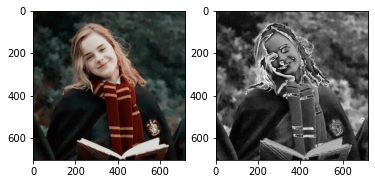

In [8]:
# ekstraksi 3 channel warna
# image[x,y,c]
R, G, B = img_color[:,:,0], img_color[:,:,1],img_color[:,:,2]
max_channels = np.maximum(np.maximum(R, G), B) #np.max(color_img, axis=2)
min_channels = np.minimum(np.minimum(R, G), B) #np.min(color_img, axis=2)

gray_img = 0.5 * (max_channels + min_channels)

f, axarr = plt.subplots(1,2) #membuat 2 plot untuk 2 citra input dan output
axarr[0].imshow(img_color)
axarr[1].imshow(gray_img, cmap='gray')

* c. Luminance

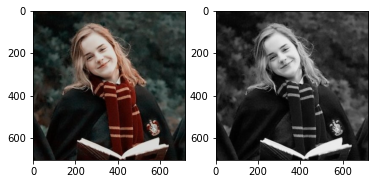

In [9]:
R, G, B = img_color[:,:,0], img_color[:,:,1],img_color[:,:,2]

gray_img = (0.21 * R) + (0.72 * G) + (0.07 * B)

f, axarr = plt.subplots(1,2)
axarr[0].imshow(img_color)
axarr[1].imshow(gray_img, cmap='gray')

4. Tampilkanlah warna tertentu pada citra, dan ubah warna lain menjadi grayscale. Misal, tampilkan warna merah pada citra masukan dan ubah bagian lain yang tidak berwarna merah menjadi grayscale seperti pada contoh berikut:

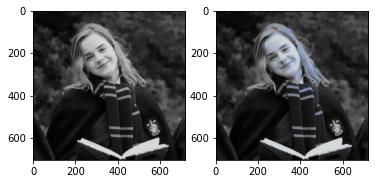

In [14]:
img = cv.imread('/content/drive/MyDrive/PCVK/m3/female.jpg')
ret, mask = cv.threshold(img[:,:,2], 180, 255, cv.THRESH_BINARY)

mask3 = np.zeros_like(img)
mask3[:,:,0] = mask
mask3[:,:,1] = mask
mask3[:,:,2] = mask

red = cv.bitwise_and(img, mask3)

gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
img= cv.cvtColor(gray, cv.COLOR_GRAY2BGR)

gray = cv.bitwise_and(img, 255 - mask3)

out = gray + red

fig, ax = plt.subplots(1,2)
ax[0].imshow(img)
ax[1].imshow(out, cmap='gray')